# SymPy

In [50]:
import sympy as sp
sp.init_printing(use_unicode=True)
from scipy import constants as cons # physical constants
import numpy as np
import matplotlib.pyplot as plt

## Basics

Initialization

In [2]:
x, y, z = sp.symbols('x y z')

Definition of Sympy symbols (variables).

In [27]:
expr1 = (2*x + 3) * (x - 6)
expr1b = (x - 6) * (2*x + 3)
expr2 = 2*x**2 -9*x - 18

In [29]:
expr1 == expr1b, expr1 == expr2

(True, False)

The first 2 expressions are identical, despite different term order.
The 3rd expression is syntactically different, but mathematically identical.

In [30]:
expr1 - expr2

In [10]:
sp.simplify(expr1 - expr2)

Simplify reveals that expr1 and expr2 are identical.

In [13]:
expr1.subs(x, sp.pi)

In [16]:
sp.simplify(expr1.subs(x, expr1))

Substitution of variables

In [24]:
sp.integrate(expr1, x)

In [32]:
sp.integrate(expr1, (x, 2, 10))

Integration without and with given interval

In [33]:
1/2, sp.S(1) / 2

Defition of numbers as symbols

## Example 1: Kinetic Energy in Special Relativity

In [35]:
beta, c, m = sp.symbols(['beta', 'c', 'm'])

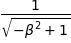

In [36]:
gamma = 1/sp.sqrt(1-beta**2)
gamma

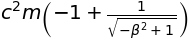

In [37]:
Ekin = (gamma - 1)*m*c**2
Ekin

In [39]:
Ekin.subs(c, cons.c).subs(beta, 0.1).subs(m, 1)

Kinetic energy (in J) of 1kg moving at 10% speed of light.

In [44]:
v = beta * c
Ekin_nr = sp.S(1)/2*m*v**2
Ekin_nr

Non-relativistic formula for kinetic energy.

In [86]:
Ekin.series(beta)

The non-relativistic formula is actually the first term of the Taylor expansion of the relativistic kinetic energy equation.

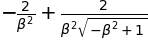

In [48]:
err = sp.simplify(Ekin / Ekin_nr)
err

Ratio of actual kinetic energy to non-relativistic approximation

## Plotting

### Plotting with Sympy

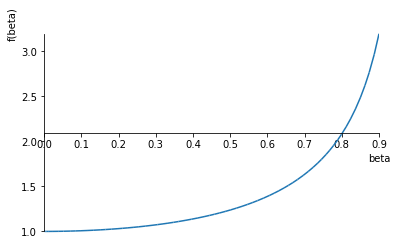

In [68]:
sp.plotting.plot(err, (beta, 0, 0.9))

### Plotting using Numpy

In [81]:
f = sp.lambdify(beta, err) # converts Sympy expression into function
f

<function _lambdifygenerated(beta)>

In [83]:
x = np.linspace(0.0001, 1, 100)

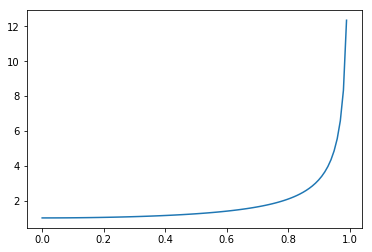

In [84]:
plt.plot(x, f(x))

## Example 2: Tsiolkovsky's Rocket Equation

https://en.wikipedia.org/wiki/Tsiolkovsky_rocket_equation

### Derivation of the Equation from Newton's Law

In [131]:
mdot, ve, m0, mdry, t, Dv = sp.symbols('mdot v_e m_0 m_dry t \Delta{V}', 
                                positive=True, real=True) # assumptions given here
                                            # for formula simplification by Sympy

In [132]:
F_exh = mdot * ve # thrust force is mass flow times exhaust velocity
F_exh

In [133]:
m = m0 - mdot * t # current mass
m

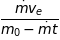

In [134]:
a = F_exh / m # current acceleration
a

In [135]:
t_max = (m0 - mdry) / mdot # time the thrust is applied until reaction mass is consumed
t_max

In [142]:
Dv = sp.integrate(a, (t, 0, t_max)).simplify()
Dv

In [147]:
sp.expand_log(Dv)

One can trivially reformulate this equation into the textbook one using

$$
    \log{a} - log{b} = \log{\frac{a}{b}}
$$

In [122]:
Dv_textbook = ve * sp.log(m0/mdry)
Dv_textbook

### Calculating Mass Ratio for Earth Orbit

In [149]:
v_leo = 9700 # low earth orbit, in m/s
ve_HO = 4400 # exhaust velocity for liquid hydrogen+ oxygen rockets

In [162]:
m0_result = sp.solve(Dv.subs(mdry, 1).subs(ve, ve_HO) - v_leo, m0)
m0_result[0].evalf() # the solver returns a list of results, even if it is only 1 element like here

According to the rocket equation, a 1 stage hydrogen/oxygen rocket must must carry more than 8 times the dry mass (i.e. payload, tanks, engines, etc.) in fuel to reach low-earth orbit.

In practice this ratio is even higher because air friction and gravitational pull has been neglected here.